In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data & Setup

- First I am loading `movies.dat` & `user_ratedmovies.dat` into memory for further analyses. If I felt need to use some additional data, I will load that as the need be.
    - In the further questions, it was asked to rated for _mean rating given to a movie by MovieLens users_ and from the data set it was not clear, which coulmn would correspond to the this rating.
    - Therefore after reading the [readme.txt](https://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-readme.txt), so I am assuming, `user_ratedmovies.dat` represents the MovieLens user ratings. I can take average of these ratings for each movie 

<br>

- I loaded this dataset from `.dat` file using refrence given in [Missing Data](https://github.com/junzhuang-code/cs533-web/blob/main/resources/tutorials/MissingData.ipynb) code files as I wasn't sure how to load and parse the `.dat` file.


- Once the data is loaded, I am using the `describe()` method on the DataFrame to extract some initial information

In [2]:
df_movies = pd.read_table('movies.dat', sep='\t', na_values=['\\N'], encoding='latin1', low_memory=False)
df_ml_ratings = pd.read_table('user_ratedmovies.dat', sep='\t', na_values=['\\N'], encoding='latin1', low_memory=False)

# to make a uniform column name for movie id across all data set
df_movies.rename(columns={"id": "movieID"}, inplace=True)

df_avg_ml_rating = df_ml_ratings.groupby('movieID')['rating'].mean().reset_index()
df_avg_ml_rating.rename(columns={'rating':'rtMlUserMeanRating'}, inplace= True)

# Left join MovieLens to movies datafream.
df_movies = df_movies.merge(df_avg_ml_rating, how='left', on='movieID')

df_movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
movieID,10197.0,12852.741002,17431.004896,1.0,2780.000000,5421.000000,8664.000000,65133.0
imdbID,10197.0,202188.472002,207128.724821,439.0,82200.000000,113057.000000,281724.000000,1349938.0
year,10197.0,1988.251643,18.688734,1903.0,1981.000000,1995.000000,2002.000000,2011.0
rtAllCriticsRating,9967.0,5.139300,2.598048,0.0,4.000000,5.800000,7.000000,9.6
rtAllCriticsNumReviews,9967.0,42.822414,50.561048,0.0,8.000000,22.000000,56.000000,281.0
rtAllCriticsNumFresh,9967.0,25.817698,35.221036,0.0,4.000000,12.000000,33.000000,265.0
rtAllCriticsNumRotten,9967.0,17.004716,26.200666,0.0,1.000000,5.000000,19.000000,171.0
rtAllCriticsScore,9967.0,56.705127,32.784319,0.0,30.000000,63.000000,86.000000,100.0
rtTopCriticsRating,9967.0,2.773874,3.139613,0.0,0.000000,0.000000,5.900000,10.0
rtTopCriticsNumReviews,9967.0,9.754891,12.148680,0.0,1.000000,4.000000,16.000000,48.0


- As can be seen from above output, we have **10,197** entires for `imdbID` however only **9,967** for RottenTomato entries. Let's see if we have any missing values for `rtID` and corresponding columns

- Further, in subsequent questions, we are intersted in ratings `rtAllCriticsRating`, `rtTopCriticsRating`, `rtAudienceRating`, & `rtMlUserMeanRating` so I will be working with these ratings only in next lines of code

In [3]:
rating_col_interested = ['rtAllCriticsRating', 'rtTopCriticsRating', 'rtAudienceRating', 'rtMlUserMeanRating']

Numerical Distribution of ratings -> rtAllCriticsRating
count    9967.000000
mean        5.139300
std         2.598048
min         0.000000
25%         4.000000
50%         5.800000
75%         7.000000
max         9.600000
Name: rtAllCriticsRating, dtype: float64
Numerical Distribution of ratings -> rtTopCriticsRating
count    9967.000000
mean        2.773874
std         3.139613
min         0.000000
25%         0.000000
50%         0.000000
75%         5.900000
max        10.000000
Name: rtTopCriticsRating, dtype: float64
Numerical Distribution of ratings -> rtAudienceRating
count    9967.000000
mean        2.497652
std         1.542419
min         0.000000
25%         0.000000
50%         3.200000
75%         3.600000
max         5.000000
Name: rtAudienceRating, dtype: float64
Numerical Distribution of ratings -> rtMlUserMeanRating
count    10109.000000
mean         3.213406
std          0.640538
min          0.500000
25%          2.851293
50%          3.312415
75%          3.681452

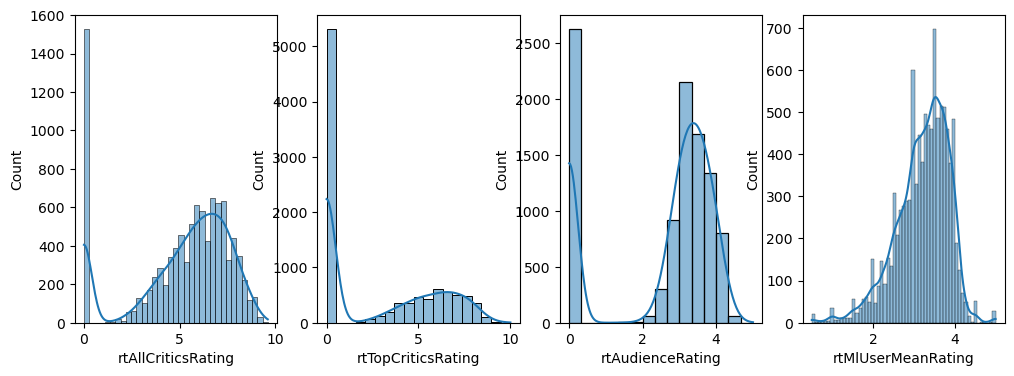

In [4]:
# Numerical and Graphical distribution of the ratings interested

fig, axes = plt.subplots(1, len(rating_col_interested), figsize=(12, 4))

for i in range(len(rating_col_interested)):
    print(f'Numerical Distribution of ratings -> {rating_col_interested[i]}')
    print(df_movies[rating_col_interested[i]].describe())
    print('='*100)
    sns.histplot(x=rating_col_interested[i], ax = axes[i], data = df_movies, kde = True)
plt.show()

- As can be seen from the above distributions, all these ratings are not normally distrbuted. Infact it seems, **0** rating has the most number of entries.
- Also, as explained in the [Missing Data](https://github.com/junzhuang-code/cs533-web/blob/main/resources/tutorials/MissingData.ipynb), 0 rating for RottenTomatoes doesn't mean anything as ratings are scaled from 1-10.
- Therefore, we can assume these **0** rated entries as missing data and can replace that missing data with proper np.nan in pandas

In [5]:
# replace missing data 0 with proper nan
for i in range(len(rating_col_interested)):
    df_movies.loc[df_movies[rating_col_interested[i]] == 0, rating_col_interested[i]] = np.nan

- This distribution is acceptable and seems reasonable as well as we have missing value rather than errorenous data(**0** rating)
- Now, if we think of filling missing values, one possible way is to check if the missing rating movies have any number of users to give a rating. If not, then that rating can actually have a 0 value.
    * I can fill these no rating available missing values with 0, however, that can impact our paired T-tests and further descriptive analyses.
    * So, in order to do a non-biased analyses, I am skipping to fill any further missing value

In [6]:
df_rating_describe = df_movies[rating_col_interested].describe().transpose()
total_rt_entires = len(df_movies)
df_rating_describe['% missing'] = (total_rt_entires - df_rating_describe['count'])*100/total_rt_entires
df_rating_describe

,count,mean,std,min,25%,50%,75%,max,% missing
rtAllCriticsRating,8441.0,6.068404,1.526898,1.2,5.000000,6.200000,7.200000,9.6,17.220751
rtTopCriticsRating,4662.0,5.930330,1.534093,1.6,4.800000,6.100000,7.100000,10.0,54.280671
rtAudienceRating,7345.0,3.389258,0.454034,1.5,3.100000,3.400000,3.700000,5.0,27.969010
rtMlUserMeanRating,10109.0,3.213406,0.640538,0.5,2.851293,3.312415,3.681452,5.0,0.862999


# Comparing Ratings

1. **Numerical and Graphical Distribution comparison for critic ratings (All Critics and Top Critics), the Audience Rating**

    - There are significant number of movies for which no review is available for each of the category, however, `rtTopCriticsRating` and `rtAudienceRating` have the most number of movies for which number of reviews are 0
    - The distribution for `rtAllCriticsRating` and `rtAudienceRating` is _right skewed_ however for `rtTopCriticsRating` is left skewed
    
    <br>
    
    - `rtAllCriticsRating` in this category, only 25\% of the movies have received a rating greater than or equal to 7.1 and 50\% movies recieved rating less than or equal to 6.
    - `rtTopCriticsRating` The top 25\% of the movies have received a rating greater than or equal to 6.6, lower than  `rtAllCriticsRating`, and 50\% movies recieved rating less than or equal to 4.7, again lower than `rtAllCriticsRating`.
    - `rtAudienceRating` Top 25\% movies have recieved a rating higher than 3.6 with a maximum rating of 5. It seems like this rating is on the scale of 1-5.
    - `rtMlUserMeanRating` as like `rtAudienceRating`, it seems like this rating is on the same scale of 1-5. The top 25% movies have a rating higher than 3.68 with a maximum rating of 5.

Numerical Distribution of ratings -> rtAllCriticsRating
count    8441.000000
mean        6.068404
std         1.526898
min         1.200000
25%         5.000000
50%         6.200000
75%         7.200000
max         9.600000
Name: rtAllCriticsRating, dtype: float64
Numerical Distribution of ratings -> rtTopCriticsRating
count    4662.000000
mean        5.930330
std         1.534093
min         1.600000
25%         4.800000
50%         6.100000
75%         7.100000
max        10.000000
Name: rtTopCriticsRating, dtype: float64
Numerical Distribution of ratings -> rtAudienceRating
count    7345.000000
mean        3.389258
std         0.454034
min         1.500000
25%         3.100000
50%         3.400000
75%         3.700000
max         5.000000
Name: rtAudienceRating, dtype: float64
Numerical Distribution of ratings -> rtMlUserMeanRating
count    10109.000000
mean         3.213406
std          0.640538
min          0.500000
25%          2.851293
50%          3.312415
75%          3.681452

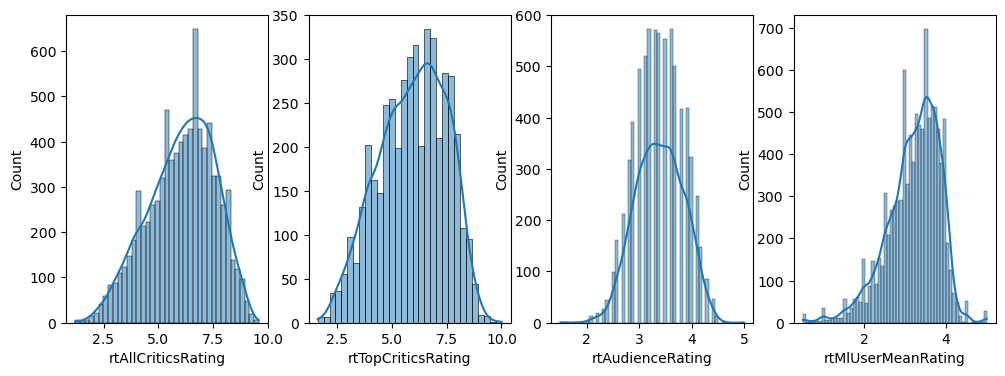

In [7]:
# Let's re visualize that data
fig, axes = plt.subplots(1, len(rating_col_interested), figsize=(12, 4))

for i in range(len(rating_col_interested)):
    print(f'Numerical Distribution of ratings -> {rating_col_interested[i]}')
    print(df_movies[rating_col_interested[i]].describe())
    print('='*100)
    sns.histplot(x=rating_col_interested[i], ax = axes[i], data = df_movies, kde = True)
plt.show()

2. **Describe the distribution of the difference between the All Critics and Top Critics ratings for movies where both are defined, both numerically and graphically.**

    - It seems like `rtAllCriticsRating` ratings are generally higher than `rtTopCriticsRating` implying Top Critics seems to be conservative in giving ratings.
    - From the distribution, we can see, on an average, the rating given by `rtAllCriticsRating` user is higher by **0.09** and 50\% of the movies rated by both, have always `rtAllCriticsRating` higher ratings compared to `rtTopCriticsRating`

Numerical Distribution of ratings -> diff_(all-top)
count    4662.000000
mean        0.094123
std         0.549673
min        -2.200000
25%        -0.200000
50%         0.100000
75%         0.400000
max         3.200000
Name: diff_(all-top), dtype: float64


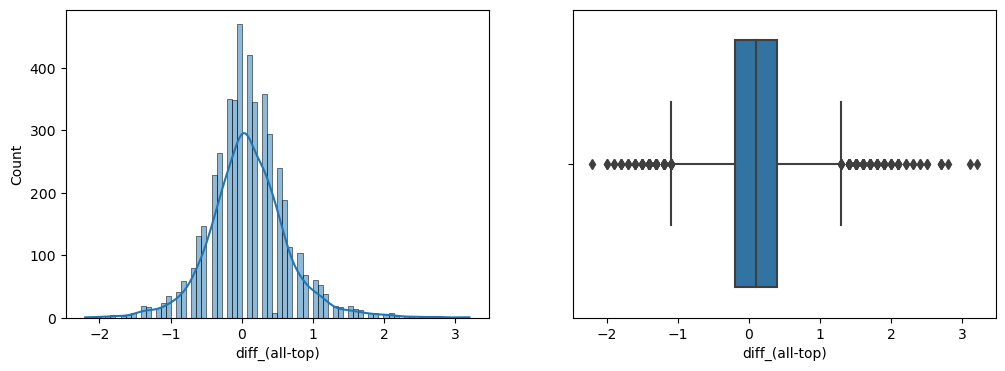

In [8]:
mask_all = df_movies['rtAllCriticsRating'].isna()
mask_top = df_movies['rtTopCriticsRating'].isna()

df_all_top_rating = df_movies[(~mask_all) & (~mask_top)][['rtAllCriticsRating', 'rtTopCriticsRating']].copy()
df_all_top_rating['diff_(all-top)'] = df_all_top_rating['rtAllCriticsRating'] - df_all_top_rating['rtTopCriticsRating']

print('Numerical Distribution of ratings -> diff_(all-top)')
print(df_all_top_rating['diff_(all-top)'].describe())
print('='*100)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(x='diff_(all-top)', data = df_all_top_rating, kde = True, ax=axes[0])

sns.boxplot(x='diff_(all-top)', data = df_all_top_rating, ax=axes[1])
plt.show()

3. **Paird T-tests**<br>
   3.1. **Between the ratings given to movies by all critics and those given by top critics**<br>
     - I used a significance level of 5\% to do the paired T-test<br>
     - From the _paired T-test_ it's clear that these 2 ratings are very much different.

In [9]:
# Null Hypothese -> There is no significance difference between 'rtAllCriticsRating' and 'rtTopCriticsRating'
# Alternate Hypo -> There is significant difference between 'rtAllCriticsRating' and 'rtTopCriticsRating'
t_statistic, p_value = stats.ttest_rel(df_all_top_rating['rtAllCriticsRating'], 
                                       df_all_top_rating['rtTopCriticsRating']
                                      )

# Print the results
print("Paired T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between 'rtAllCriticsRating' and 'rtTopCriticsRating'")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between 'rtAllCriticsRating' and 'rtTopCriticsRating'")

Paired T-Test Results:
T-statistic: 11.691646881769833
P-value: 3.813058893006197e-31
Reject the null hypothesis: There is a significant difference between 'rtAllCriticsRating' and 'rtTopCriticsRating'


3. **Paird T-tests**<br>
   3.1. **Between average audience rating RottenTomatoes users give to a movie and the mean rating MovieLens users**<br>
     - Since these both ratings are on the same scale and thus are compareable.
     - I will compare the ratings where the data is available for both ratings only
     - I used a significance level of 5\% to do the paired T-test<br>
     - From the _paired T-test_ it's clear that these 2 ratings are very much different.

Numerical Distribution of ratings -> diff_(audience-ml)
count    7314.000000
mean        0.148691
std         0.457967
min        -2.100000
25%        -0.106454
50%         0.091838
75%         0.343147
max         3.900000
Name: diff_(audience-ml), dtype: float64


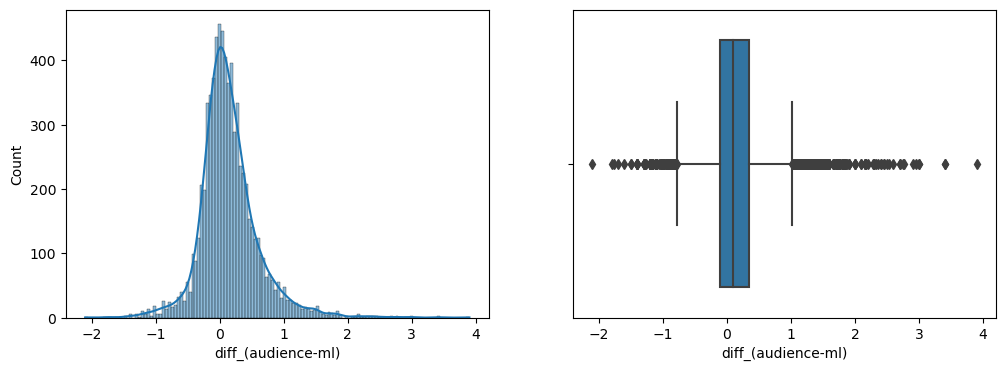

Paired T-Test Results:
T-statistic: 27.76689581170543
P-value: 2.0388425974633915e-161
Reject the null hypothesis: There is a significant difference between 'rtAudienceRating' and 'rtMlUserMeanRating'


In [10]:
mask_audience = df_movies['rtAudienceRating'].isna()
mask_ml_users = df_movies['rtMlUserMeanRating'].isna()

df_both_avail = df_movies[(~mask_audience) & (~mask_ml_users)].copy()

df_both_avail['diff_(audience-ml)'] = df_both_avail['rtAudienceRating'] - df_both_avail['rtMlUserMeanRating']

print('Numerical Distribution of ratings -> diff_(audience-ml)')
print(df_both_avail['diff_(audience-ml)'].describe())
print('='*100)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(x='diff_(audience-ml)', data = df_both_avail, kde = True, ax=axes[0])

sns.boxplot(x='diff_(audience-ml)', data = df_both_avail, ax=axes[1])
plt.show()


# Null Hypothese -> There is no significance difference between 'rtAudienceRating' and 'rtMlUserMeanRating'
# Alternate Hypo -> There is significant difference between 'rtAudienceRating' and 'rtMlUserMeanRating'
t_statistic, p_value = stats.ttest_rel(df_both_avail['rtAudienceRating'], 
                                       df_both_avail['rtMlUserMeanRating']
                                      )

# Print the results
print("Paired T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between 'rtAudienceRating' and 'rtMlUserMeanRating'")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between 'rtAudienceRating' and 'rtMlUserMeanRating'")

# Confidence Intervals

In [11]:
df_genres = pd.read_table('movie_genres.dat', sep='\t', na_values=['\\N'], encoding='latin1', low_memory=False)

# Merge ratings with genres
df_genres = df_genres.merge(df_movies, on='movieID')

In [12]:
df_ci = df_genres.groupby('genre').agg({'rtAllCriticsRating': 
                                        ['count','min','max','median','mean','std']}
                                      ).reset_index().copy()
df_ci.columns = df_ci.columns.droplevel(level=0)
df_ci.rename(columns={'':'genre'}, inplace=True)

1. **For each of the 20 genres, compute the mean and a 95% confidence interval for the all-critic ratings using the standard error method. Show the results as a data frame sorted by decreasing mean (look up the sort_values method in Pandas). Does it look like the top two genres have different mean critic ratings? Does it look like the top and bottom genres have different mean critic ratings? Defend your answers using the confidence intervals.**

Below is the sorted dataframe for all 20 genres showing confidence interevals and corresponding standard errors. The dataframe is sorted by `mean` value in a decresing order.

`The top two genres have different mean critic ratings?` Indeed the top 2 genres (Film-Noir, Documentary) have different critics rating, as the mean rating for __Film-Noir__ will be between 7.48 and 7.03 however for Documentary it can be 7.23 and 7.03. These ranges are quite different hence the top 2 genres have different mean critic ratings.

`Bottom genres have different mean critic ratings` as like top 2 rated genres, the bottom 2 genres also don't have same mean critic ratings.

In [13]:
col_mean = ('mean')
col_std = ('std')
col_count = ('count')
z_value = 1.96 # for 95% confidence interval

df_ci['std_error'] = df_ci[col_std]/ np.sqrt(df_ci[col_count])
df_ci['ci_higher'] = df_ci[col_mean] + z_value*df_ci['std_error']
df_ci['ci_lower'] = df_ci[col_mean] - z_value*df_ci['std_error']
df_ci = df_ci.sort_values(by=col_mean, ascending= False)

df_ci

,genre,count,min,max,median,mean,std,std_error,ci_higher,ci_lower
9,Film-Noir,127,3.7,9.3,7.60,7.253543,1.273527,0.113007,7.475038,7.032049
6,Documentary,334,2.6,9.1,7.30,7.129641,0.979147,0.053577,7.234651,7.024631
11,IMAX,16,5.9,8.4,7.00,6.950000,0.747440,0.186860,7.316246,6.583754
18,War,388,1.9,9.2,6.90,6.753351,1.354775,0.068778,6.888156,6.618545
19,Western,193,1.8,9.0,6.70,6.613472,1.394007,0.100343,6.810143,6.416800
12,Musical,347,2.3,9.4,6.70,6.483573,1.319328,0.070825,6.622391,6.344756
7,Drama,4306,1.9,9.6,6.60,6.462657,1.337138,0.020377,6.502596,6.422718
2,Animation,235,3.0,9.1,6.40,6.343404,1.393417,0.090897,6.521561,6.165247
13,Mystery,434,1.9,9.4,6.40,6.228571,1.488513,0.071451,6.368615,6.088528
14,Romance,1427,1.9,9.5,6.30,6.194744,1.432974,0.037934,6.269094,6.120394


2. **For each of the 20 genres, compute the mean and a 95% bootstrapped confidence interval for the mean all-critic rating. Show the result in a table. Does this look the same as the standard error CIs?**

 - I used the same code available in [PenguinSamples.ipynb](https://github.com/junzhuang-code/cs533-web/blob/main/resources/tutorials/PenguinSamples.ipynb) to do the bootstap.
 - The CIs computed using Standard Error and Bootstrap are not exactly the same for all genres.

In [14]:
rng = np.random.default_rng(20200913)

def boot_mean_estimate(vals, nboot=10000):
    obs = vals.dropna()  # ignore missing values
    mean = obs.mean()
    n = obs.count()
    
    if n == 0:
        return pd.Series({
            'mean_bootstrap': np.nan,
            'ci_bootstrap_lower': np.nan,
            'ci_bootstrap_higher': np.nan
        })
    
    boot_means = [np.mean(rng.choice(obs, size=n)) for i in range(nboot)]
    ci_low, ci_high = np.quantile(boot_means, [0.025, 0.975])
    return pd.Series({
        'mean_bootstrap': mean,
        'ci_bootstrap_lower': ci_low,
        'ci_bootstrap_higher': ci_high
    })


df_bootstrap = df_genres.groupby('genre')['rtAllCriticsRating'].apply(boot_mean_estimate).unstack().reset_index()

df_ci = df_ci.merge(df_bootstrap, on = 'genre')
df_ci = df_ci.sort_values(by=col_mean, ascending= False)
df_ci['is_CIs_same'] = (df_ci['ci_higher'] == df_ci['ci_bootstrap_higher']) & (df_ci['ci_lower'] == df_ci['ci_bootstrap_lower'])
df_ci

,genre,count,min,max,median,mean,std,std_error,ci_higher,ci_lower,mean_bootstrap,ci_bootstrap_lower,ci_bootstrap_higher,is_CIs_same
0,Film-Noir,127,3.7,9.3,7.60,7.253543,1.273527,0.113007,7.475038,7.032049,7.253543,7.029921,7.467717,False
1,Documentary,334,2.6,9.1,7.30,7.129641,0.979147,0.053577,7.234651,7.024631,7.129641,7.020951,7.235030,False
2,IMAX,16,5.9,8.4,7.00,6.950000,0.747440,0.186860,7.316246,6.583754,6.950000,6.606250,7.306250,False
3,War,388,1.9,9.2,6.90,6.753351,1.354775,0.068778,6.888156,6.618545,6.753351,6.618557,6.887113,False
4,Western,193,1.8,9.0,6.70,6.613472,1.394007,0.100343,6.810143,6.416800,6.613472,6.412435,6.805699,False
5,Musical,347,2.3,9.4,6.70,6.483573,1.319328,0.070825,6.622391,6.344756,6.483573,6.345814,6.621909,False
6,Drama,4306,1.9,9.6,6.60,6.462657,1.337138,0.020377,6.502596,6.422718,6.462657,6.422734,6.502323,False
7,Animation,235,3.0,9.1,6.40,6.343404,1.393417,0.090897,6.521561,6.165247,6.343404,6.167660,6.519574,False
8,Mystery,434,1.9,9.4,6.40,6.228571,1.488513,0.071451,6.368615,6.088528,6.228571,6.088249,6.367972,False
9,Romance,1427,1.9,9.5,6.30,6.194744,1.432974,0.037934,6.269094,6.120394,6.194744,6.119690,6.270922,False


# Popularity and Bootstraps

1. **Test the null hypothesis that action movies and documentaries have the same median number of ratings using a bootstrapped p-value. Does your test accept or reject the null? What are the median number of ratings for movies in each of these genres?**
    - We accept the null hypotheses based on bootstrapped p-value

In [15]:
df_movie_user_count = df_ml_ratings.groupby('movieID')['userID'].count().reset_index()
df_movie_user_count.rename(columns={'userID':'numRatings'}, inplace=True)
df_movie_user_count = df_movie_user_count.merge(df_genres[['movieID','genre']], on='movieID')
df_action = df_movie_user_count[df_movie_user_count['genre'] == 'Action'].copy()
df_doc = df_movie_user_count[df_movie_user_count['genre'] == 'Documentary'].copy()

In [16]:
# Calculate the observed difference in median ratings
observed_difference = np.median(df_action['numRatings']) - np.median(df_doc['numRatings'])

# Number of bootstrap samples
num_samples = 10000

# Initialize an empty array to store bootstrap differences
bootstrap_differences = np.empty(num_samples)

# Perform bootstrapping
for i in range(num_samples):
    # Randomly sample with replacement from both genres
    action_sample = np.random.choice(df_action['numRatings'], len(df_action['numRatings']), replace=True)
    documentary_sample = np.random.choice(df_doc['numRatings'], len(df_doc['numRatings']), replace=True)
    
    # Calculate the difference in medians for this sample
    bootstrap_differences[i] = np.median(action_sample) - np.median(documentary_sample)

# Calculate the p-value
p_value = np.mean(bootstrap_differences >= observed_difference)

alpha = 0.05  # Set your significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Accept the null hypothesis"

# Calculate the median number of ratings for each genre
median_ratings_action = np.median(df_action['numRatings'])
median_ratings_documentary = np.median(df_doc['numRatings'])

# Print results
print(f"Observed Difference in Median Ratings: {observed_difference}")
print(f"Bootstrapped p-value: {p_value}")
print(f"Result: {result}")
print(f"Median Ratings for Action Movies: {median_ratings_action}")
print(f"Median Ratings for Documentaries: {median_ratings_documentary}")

Observed Difference in Median Ratings: 44.5
Bootstrapped p-value: 0.4756
Result: Accept the null hypothesis
Median Ratings for Action Movies: 56.0
Median Ratings for Documentaries: 11.5


2. **What if you use the # of audience ratings from RottenTomatoes instead of the # of MovieLens ratings?**
    - The results are same even if we use # of audience ratings 

In [17]:
df_aud = df_genres[['movieID','genre']].merge(df_movies[['movieID','rtAudienceNumRatings']], on='movieID').copy()
df_aud.dropna(inplace=True)
df_action = df_aud[df_aud['genre'] == 'Action'].copy()
df_doc = df_aud[df_aud['genre'] == 'Documentary'].copy()

# Calculate the observed difference in median ratings
observed_difference = np.median(df_action['rtAudienceNumRatings']) - np.median(df_doc['rtAudienceNumRatings'])

# Number of bootstrap samples
num_samples = 10000

# Initialize an empty array to store bootstrap differences
bootstrap_differences = np.empty(num_samples)

# Perform bootstrapping
for i in range(num_samples):
    # Randomly sample with replacement from both genres
    action_sample = np.random.choice(df_action['rtAudienceNumRatings'], len(df_action['rtAudienceNumRatings']), replace=True)
    documentary_sample = np.random.choice(df_doc['rtAudienceNumRatings'], len(df_doc['rtAudienceNumRatings']), replace=True)
    
    # Calculate the difference in medians for this sample
    bootstrap_differences[i] = np.median(action_sample) - np.median(documentary_sample)

# Calculate the p-value
p_value = np.mean(bootstrap_differences >= observed_difference)

alpha = 0.05  # Set your significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Accept the null hypothesis"

# Calculate the median number of ratings for each genre
median_ratings_action = np.median(df_action['rtAudienceNumRatings'])
median_ratings_documentary = np.median(df_doc['rtAudienceNumRatings'])

# Print results
print(f"Observed Difference in Median Ratings: {observed_difference}")
print(f"Bootstrapped p-value: {p_value}")
print(f"Result: {result}")
print(f"Median Ratings for Action Movies: {median_ratings_action}")
print(f"Median Ratings for Documentaries: {median_ratings_documentary}")

Observed Difference in Median Ratings: 4866.0
Bootstrapped p-value: 0.4981
Result: Accept the null hypothesis
Median Ratings for Action Movies: 5353.0
Median Ratings for Documentaries: 487.0


3. **Compare the mean of the critic ratings (using the All Critics ratings from Rotten Tomatoes) between action and documentary movies. Is there a difference? Test the difference with both the bootstrap and an approprate t-test.**

    - Based on the rating `rtAllCriticsRating`, on average, action movies in the sample received a critic rating of approximately 5.57 & documentary movies 7.13
    - The very small p-value indicates that there is strong evidence to suggest that the difference in mean critic ratings between action and documentary movies is statistically significant. In other words, it's highly unlikely that the observed difference in mean ratings occurred by chance.
    - The CI suggests that, with 95% confidence, the true difference in mean critic ratings between action and documentary movies is likely to be somewhere between -1.69271119 and -1.42091679.
    - Since this interval does not include zero, it further supports the conclusion that there is a significant difference in mean critic ratings between the two types of movies.

In [18]:
df_aud = df_genres[['movieID','genre']].merge(df_movies[['movieID','rtAllCriticsRating']], on='movieID').copy()
df_aud.dropna(inplace=True)
df_action = df_aud[df_aud['genre'] == 'Action'].copy()
df_doc = df_aud[df_aud['genre'] == 'Documentary'].copy()

# Calculate the means of critic ratings for each group
mean_action = np.mean(df_action['rtAllCriticsRating'])
mean_documentary = np.mean(df_doc['rtAllCriticsRating'])

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(df_action['rtAllCriticsRating'], df_doc['rtAllCriticsRating'])

# Bootstrap resampling
n_bootstrap = 10000
bootstrap_means_diff = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    action_sample = np.random.choice(df_action['rtAllCriticsRating'], len(df_action['rtAllCriticsRating']), replace=True)
    documentary_sample = np.random.choice(df_doc['rtAllCriticsRating'], len(df_doc['rtAllCriticsRating']), replace=True)
    bootstrap_means_diff[i] = np.mean(action_sample) - np.mean(documentary_sample)

# Calculate a 95% confidence interval for the bootstrap mean difference
confidence_interval = np.percentile(bootstrap_means_diff, [2.5, 97.5])

# Print the results
print(f"Mean Critic Rating for Action Movies: {mean_action}")
print(f"Mean Critic Rating for Documentary Movies: {mean_documentary}")
print(f"Two-sample t-test p-value: {p_value}")
print(f"95% Confidence Interval for Bootstrap Mean Difference: {confidence_interval}")

Mean Critic Rating for Action Movies: 5.5744966442953015
Mean Critic Rating for Documentary Movies: 7.129640718562875
Two-sample t-test p-value: 3.0246362376002706e-61
95% Confidence Interval for Bootstrap Mean Difference: [-1.68944429 -1.41795421]


# Reflection

* **Learnings** <br>
    - I first learned the concept of descriptive statistics and how to read the visualization graphs. I learnt to perform different tests, such as `paird T-test`, `Bootstrap p-value` etc., and how to use these tests to make conclusions about data.
        * Like using `paird T-test` I was able to comment whether ratings _rtAllCriticsRating_ and _rtTopCriticsRating_ are same or different.
    - I also learnt how to calculate the Confidence Intervals using both `Standaed Error` and `Bootstrap`. From this I think `Bootstrap` is a better method to compute the CIs as we are taking samples with replacement and using that sample means to get the qunatile ranges which seems more robust than `Standaed Error`.
    - It helped in my critical thinking as I was asked to defend my answers using confidence intervals and statistical tests. This process encouraged critical thinking and helped me interpret the results in the context of the data.
    

Other than these learings, I learned in general about movie ratings, what different ratings mean and how do these differ from one another. Another thing I enjoyed doing this is helping on my python programming skills and using math in python coding. So overall a great learning from this assignment :)